In [230]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from skimage import data, filters, draw
import matplotlib.pyplot as plt
from skimage.draw import rectangle
from skimage.morphology import disk
from skimage import morphology
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
import math
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['font.size'] = 18
import plotly.graph_objects as go
from plotly.subplots import make_subplots
output_folder_csv = "../output/csv"
video_name = "010_001_test"
df_raw_angles = pd.read_csv(os.path.join(output_folder_csv, f"{video_name}.csv"))
df_raw_angles

,frame,angle_0,angle_1,angle_2,i_p_0_0_x,i_p_0_0_y,i_p_0_x,i_p_0_y,i_p_1_x,i_p_1_y,i_p_2_x,i_p_2_y,i_p_3_x,i_p_3_y,time
0,0,152.760279,145.150848,161.911018,328,645,431,502,589,375,673,374,762,409,0.000000
1,1,152.760279,145.150848,163.176450,328,645,431,502,589,375,673,374,762,408,0.002083
2,2,152.760279,145.150848,163.176450,328,645,431,502,589,375,673,374,762,408,0.004167
3,3,152.760279,145.409518,162.917780,328,645,431,502,589,375,673,374,762,408,0.006250
4,4,152.760279,145.409518,162.917780,328,645,431,502,589,375,673,374,762,408,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10313,10313,137.460719,75.356557,175.971736,332,662,405,501,554,366,585,428,588,522,21.485417
10314,10314,136.132541,74.892455,178.058514,332,662,406,501,556,367,585,429,588,523,21.487500
10315,10315,136.132541,74.892455,176.522213,332,662,406,501,556,367,585,429,586,524,21.489583
10316,10316,136.486214,72.434985,177.160786,332,662,406,501,556,367,584,430,583,525,21.491667


In [314]:
def calculate_angle(line1, line2):
    # Convert lines to numpy arrays
    line1 = np.array(line1)
    line2 = np.array(line2)

    # line1 include 2 sets -> to poins define by X Y for define line
    # print(line1)




    # Calculate the vectors corresponding to the lines
    vector1 = line1[1] - line1[0]
    vector2 = line2[1] - line2[0]

    # Calculate the dot product and cross product of the vectors
    dot_product = np.dot(vector1, vector2)
    cross_product = np.cross(vector1, vector2)



    # Calculate the magnitudes of the vectors
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the cosine of the angle between the vectors
    cosine_theta = np.abs(dot_product) / (magnitude1 * magnitude2)
    # print(dot_product,cross_product,magnitude1, magnitude2)
    # Determine the sign of the dot product to determine the direction
    angle_radians = np.arccos(cosine_theta)
    # Determine the sign of the cross product to determine the orientation
    orientation = np.sign(cross_product)
    print(dot_product,cross_product)
    # print(line1)
    # print(line2)
    angle_degrees_bckp = np.degrees(angle_radians)
    print(angle_degrees_bckp)
    print(orientation)

    # Determine the sign of the cross product to determine the orientation



    if dot_product > 0:
        angle_radians = np.arccos(cosine_theta)
        # Convert the angle to degrees
        angle_degrees = 180 - np.degrees(angle_radians)
        # Adjust angle for the cross product sign
        if orientation < 0:
            angle_degrees = 360 - angle_degrees
        if cross_product < 0:
            if orientation < 0:
                if angle_degrees_bckp > 45:
                    print("bad")
                    angle_degrees = angle_degrees_bckp

    else:
        angle_radians = np.arccos(cosine_theta)
        # Convert the angle to degrees
        angle_degrees = np.degrees(angle_radians)
        if orientation < 0:
            angle_degrees = 180 - angle_degrees
    print("---------------------")

    return angle_degrees


In [315]:
df_raw_angles.columns

Index(['frame', 'angle_0', 'angle_1', 'angle_2', 'i_p_0_0_x', 'i_p_0_0_y',
       'i_p_0_x', 'i_p_0_y', 'i_p_1_x', 'i_p_1_y', 'i_p_2_x', 'i_p_2_y',
       'i_p_3_x', 'i_p_3_y', 'time'],
      dtype='object')

In [325]:
canvas = np.zeros((1500,1500))
row = df_raw_angles[0:1]

x_shift = int((canvas.shape[0] / 2) - row["i_p_0_0_x"])
y_shift = int((canvas.shape[1] / 2) - row["i_p_0_0_y"])

row["i_p_0_0_x"] = row["i_p_0_0_x"] + x_shift
row["i_p_0_0_y"] = row["i_p_0_0_y"] + y_shift

row["i_p_0_x"] = row["i_p_0_x"] + x_shift
row["i_p_0_y"] = row["i_p_0_y"] + y_shift

row["i_p_1_x"] = row["i_p_1_x"] + x_shift
row["i_p_1_y"] = row["i_p_1_y"] + y_shift

row["i_p_2_x"] = row["i_p_2_x"] + x_shift
row["i_p_2_y"] = row["i_p_2_y"] + y_shift

row["i_p_3_x"] = row["i_p_3_x"] + x_shift
row["i_p_3_y"] = row["i_p_3_y"] + y_shift


/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_89551/1170287733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["i_p_0_0_x"] = row["i_p_0_0_x"] + x_shift
/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_89551/1170287733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["i_p_0_0_y"] = row["i_p_0_0_y"] + y_shift
/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_89551/1170287733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [326]:

canvas[row["i_p_0_0_x"], row["i_p_0_0_y"]] = 1
canvas[row["i_p_0_x"], row["i_p_0_y"]] = 1
canvas[row["i_p_1_x"], row["i_p_1_y"]] = 1
canvas[row["i_p_2_x"], row["i_p_2_y"]] = 1
canvas[row["i_p_3_x"], row["i_p_3_y"]] = 1

# point for agle
row["marker_a_x"] = row["i_p_0_0_x"] + 100
row["marker_a_y"]  = row["i_p_0_0_y"]

row["marker_b_x"] = row["i_p_0_0_x"] + 200
row["marker_b_y"]  = row["i_p_0_0_y"]

canvas[row["marker_a_x"], row["marker_a_y"]] = 1
canvas[row["marker_b_x"], row["marker_b_y"]] = 1
canvas = morphology.dilation(canvas, np.ones((5,5)))
canvas = canvas.T

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_89551/2111964622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["marker_a_x"] = row["i_p_0_0_x"] + 100
/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_89551/2111964622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["marker_a_y"]  = row["i_p_0_0_y"]
/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_89551/2111964622.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


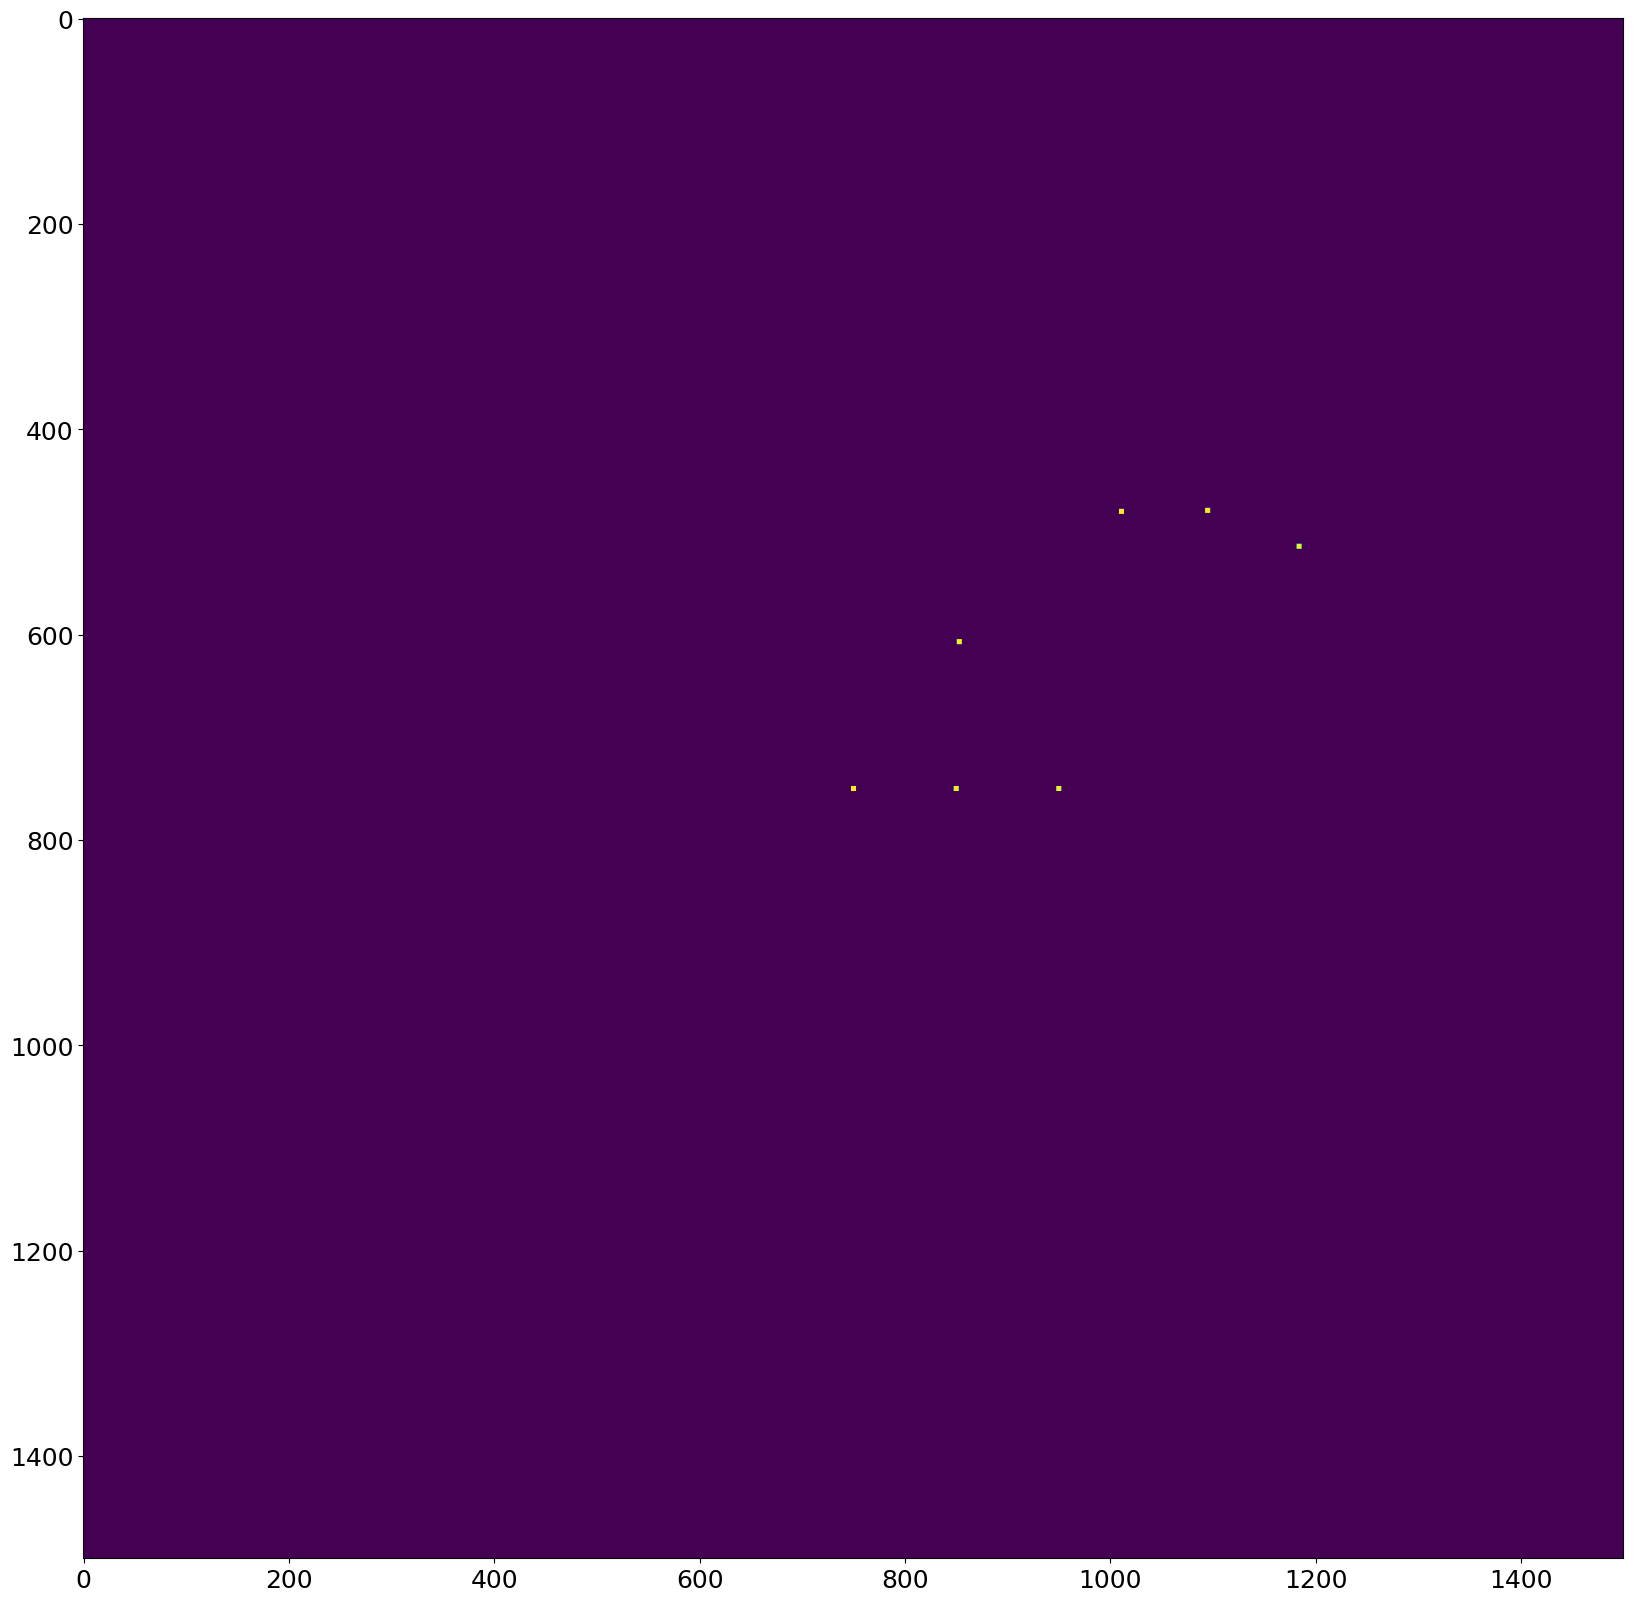

In [327]:
plt.figure(figsize=(20,20))
plt.imshow(canvas)


In [419]:
shift_angle =  calculate_angle(
    (
        (int(row["i_p_0_x"]), int(row["i_p_0_y"])), (int(row["i_p_0_0_x"]), int(row["i_p_0_0_y"]))
    ),
    (
        (int(row["marker_a_x"]), int(row["marker_a_y"])), (int(row["marker_b_x"]), int(row["marker_b_y"]))
    )
)

-10300 -14300
54.235559093165925
-1
---------------------


In [427]:
shift_angle =  calculate_angle(
    (
        (int(row["i_p_0_x"]), int(row["i_p_0_y"])), (int(row["i_p_0_0_x"]), int(row["i_p_0_0_y"]))
    ),
    (
        (int(row["i_p_0_0_x"]), int(row["i_p_0_0_y"])), (int(row["marker_a_x"]), int(row["marker_a_y"]))
    )
)

-10300 -14300
54.235559093165925
-1
---------------------


In [426]:
shift_angle

125.76444090683407

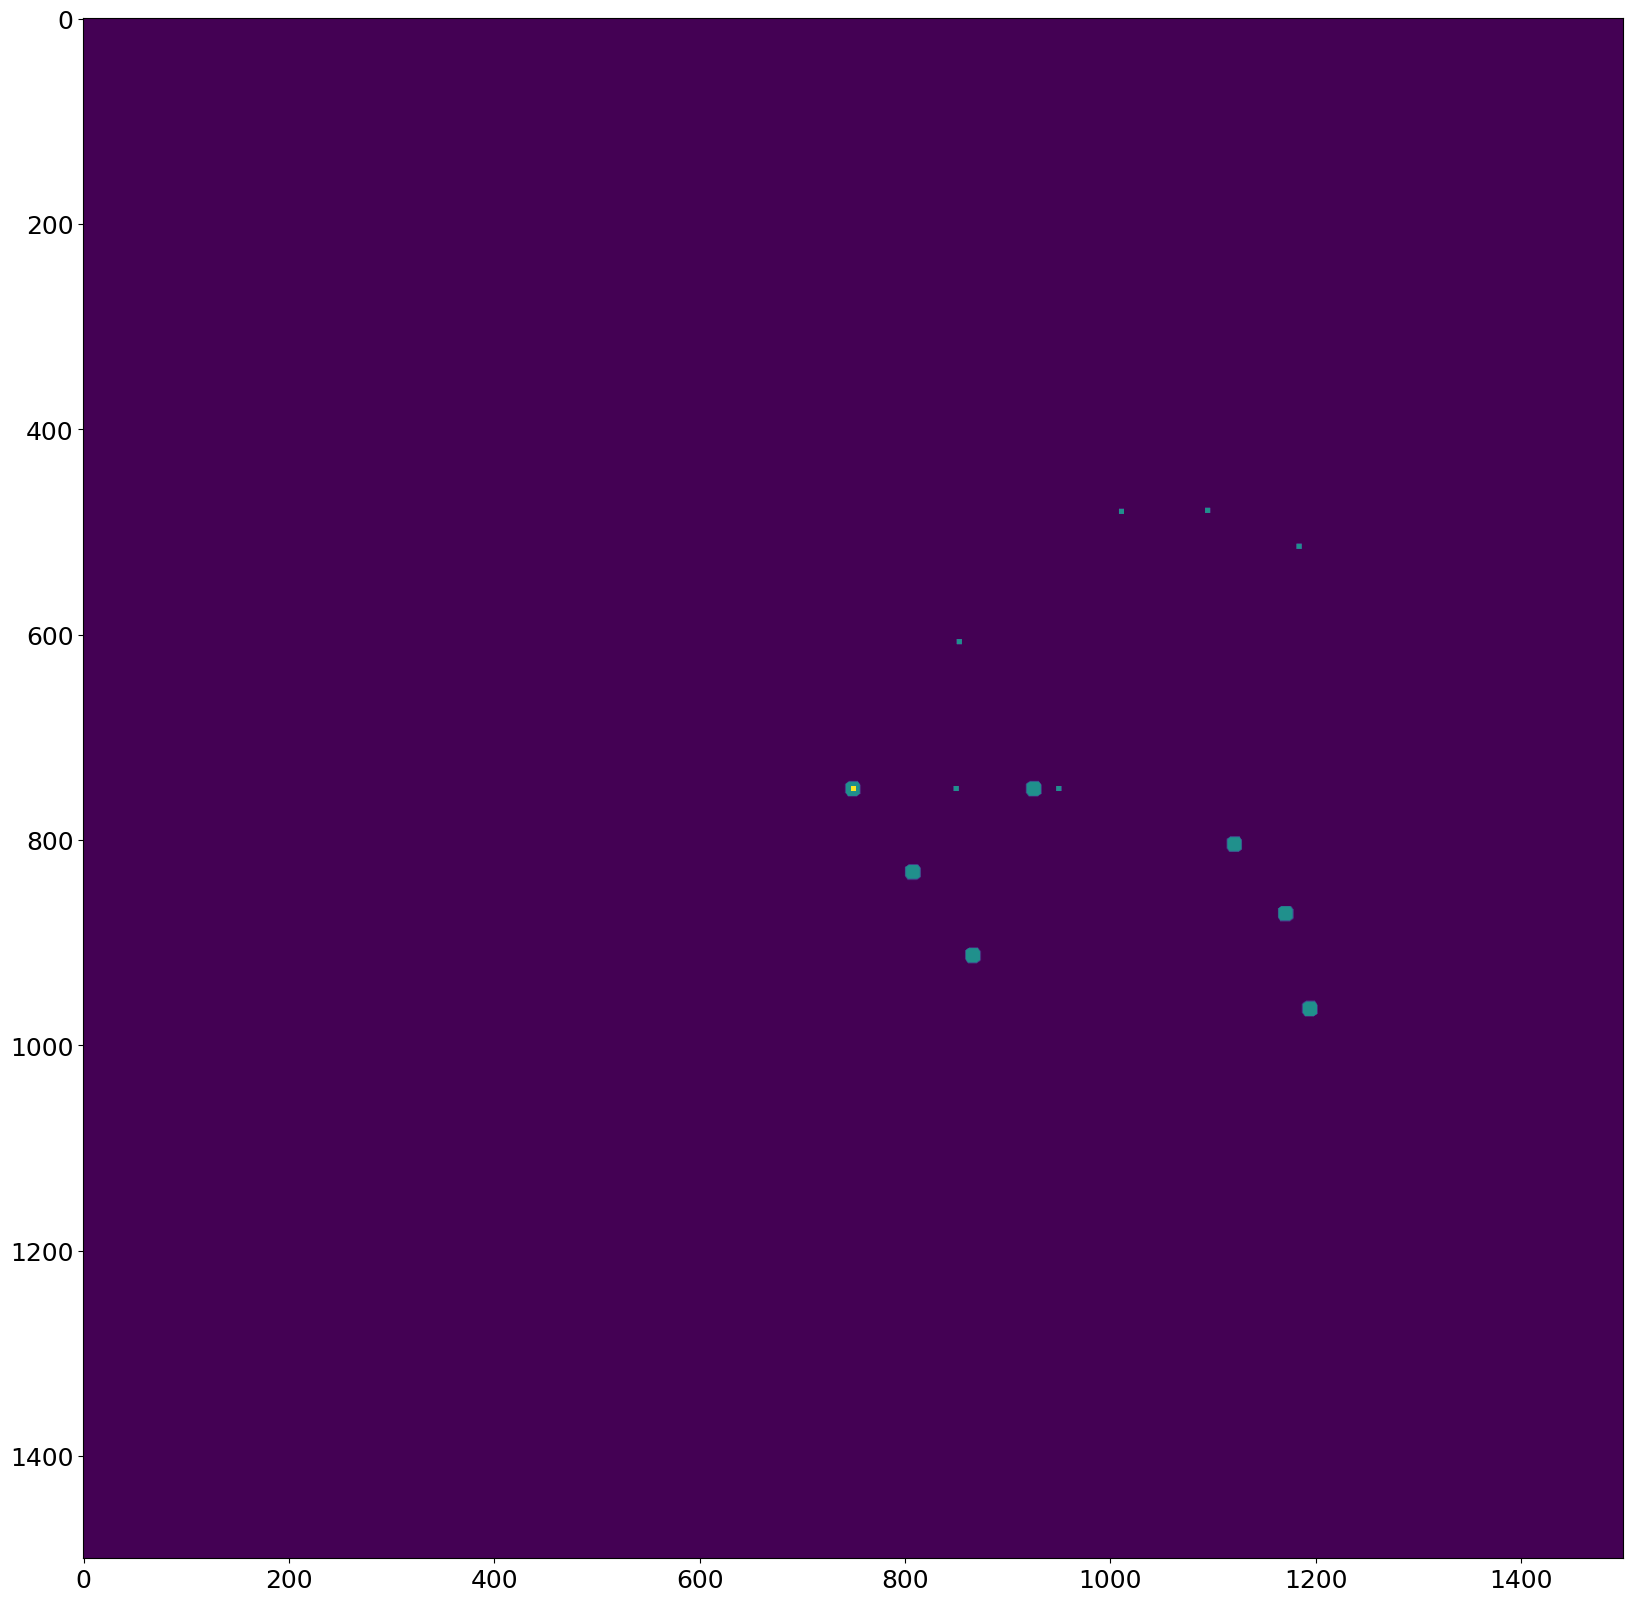

In [371]:
from skimage.transform import rotate
rotated = rotate(canvas, angle= (180 - shift_angle) * -1)
rotated = morphology.dilation(rotated, np.ones((5,5)))
rotated = morphology.dilation(rotated, np.ones((5,5)))

plt.figure(figsize=(20,20))
plt.imshow(rotated + canvas)


In [370]:
180 - shift_angle

54.23555909316593

In [429]:
shift_angle

125.76444090683407

In [430]:
def shift_point(x, y, angle, distance):

    # Convert angle from degrees to radians
    angle_rad = math.radians(angle)

    # Calculate the new coordinates after the shift
    new_x = int(x) + distance * math.cos(angle_rad)
    new_y = int(y) + distance * math.sin(angle_rad)



    return int(new_x), int(new_y)


In [431]:
def circumference_of_circle(radius, angle_in_degrees):
    # Convert the angle from degrees to radians
    angle_in_radians = math.radians(angle_in_degrees)

    # Calculate the circumference for the portion of the circle
    circumference = 2 * math.pi * radius * (angle_in_radians / (2 * math.pi))

    return circumference

In [432]:
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2

    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [433]:
radius = circumference_of_circle(calculate_distance((row["i_p_0_x"],row["i_p_0_y"]), (row["i_p_0_0_x"],row["i_p_0_0_y"])), 180 - shift_angle)

max_dist = circumference_of_circle(radius, 180 -shift_angle)


In [434]:
def rotate_coordinates(points, angle, center=(0, 0)):
    """
    Rotate a set of coordinates around a specified center.

    Parameters:
    - points: A list of (x, y) coordinates to be rotated.
    - angle: The rotation angle in degrees.
    - center: The center of rotation. Default is (0, 0).

    Returns:
    - Rotated coordinates as a numpy array.
    """
    angle_rad = np.radians(angle)
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)

    # Translate to the origin, rotate, and translate back
    centered_points = np.array(points) - np.array(center)
    rotated_points = np.dot(centered_points, np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]]))
    rotated_points += np.array(center)

    return rotated_points

# Example usage:
original_points = [(1, 1), (2, 2), (3, 1)]
rotation_angle = 45  # degrees
rotation_center = (2, 2)

rotated_points = rotate_coordinates(original_points, rotation_angle, rotation_center)
print("Original Points:", original_points)
print("Rotated Points:", rotated_points)

Original Points: [(1, 1), (2, 2), (3, 1)]
Rotated Points: [[0.58578644 2.        ]
 [2.         2.        ]
 [2.         0.58578644]]


In [435]:
rotated_points = rotate_coordinates([(int(row["i_p_0_x"]), int(row["i_p_0_y"])),
                                     (int(row["i_p_1_x"]), int(row["i_p_1_y"])),
                                     (int(row["i_p_2_x"]), int(row["i_p_2_y"])),
                                     (int(row["i_p_3_x"]), int(row["i_p_3_y"]))
                                     ], -54, (int(row["i_p_0_0_x"]),int(row["i_p_0_0_y"])))

In [436]:
int(rotated_points[0][0])

926

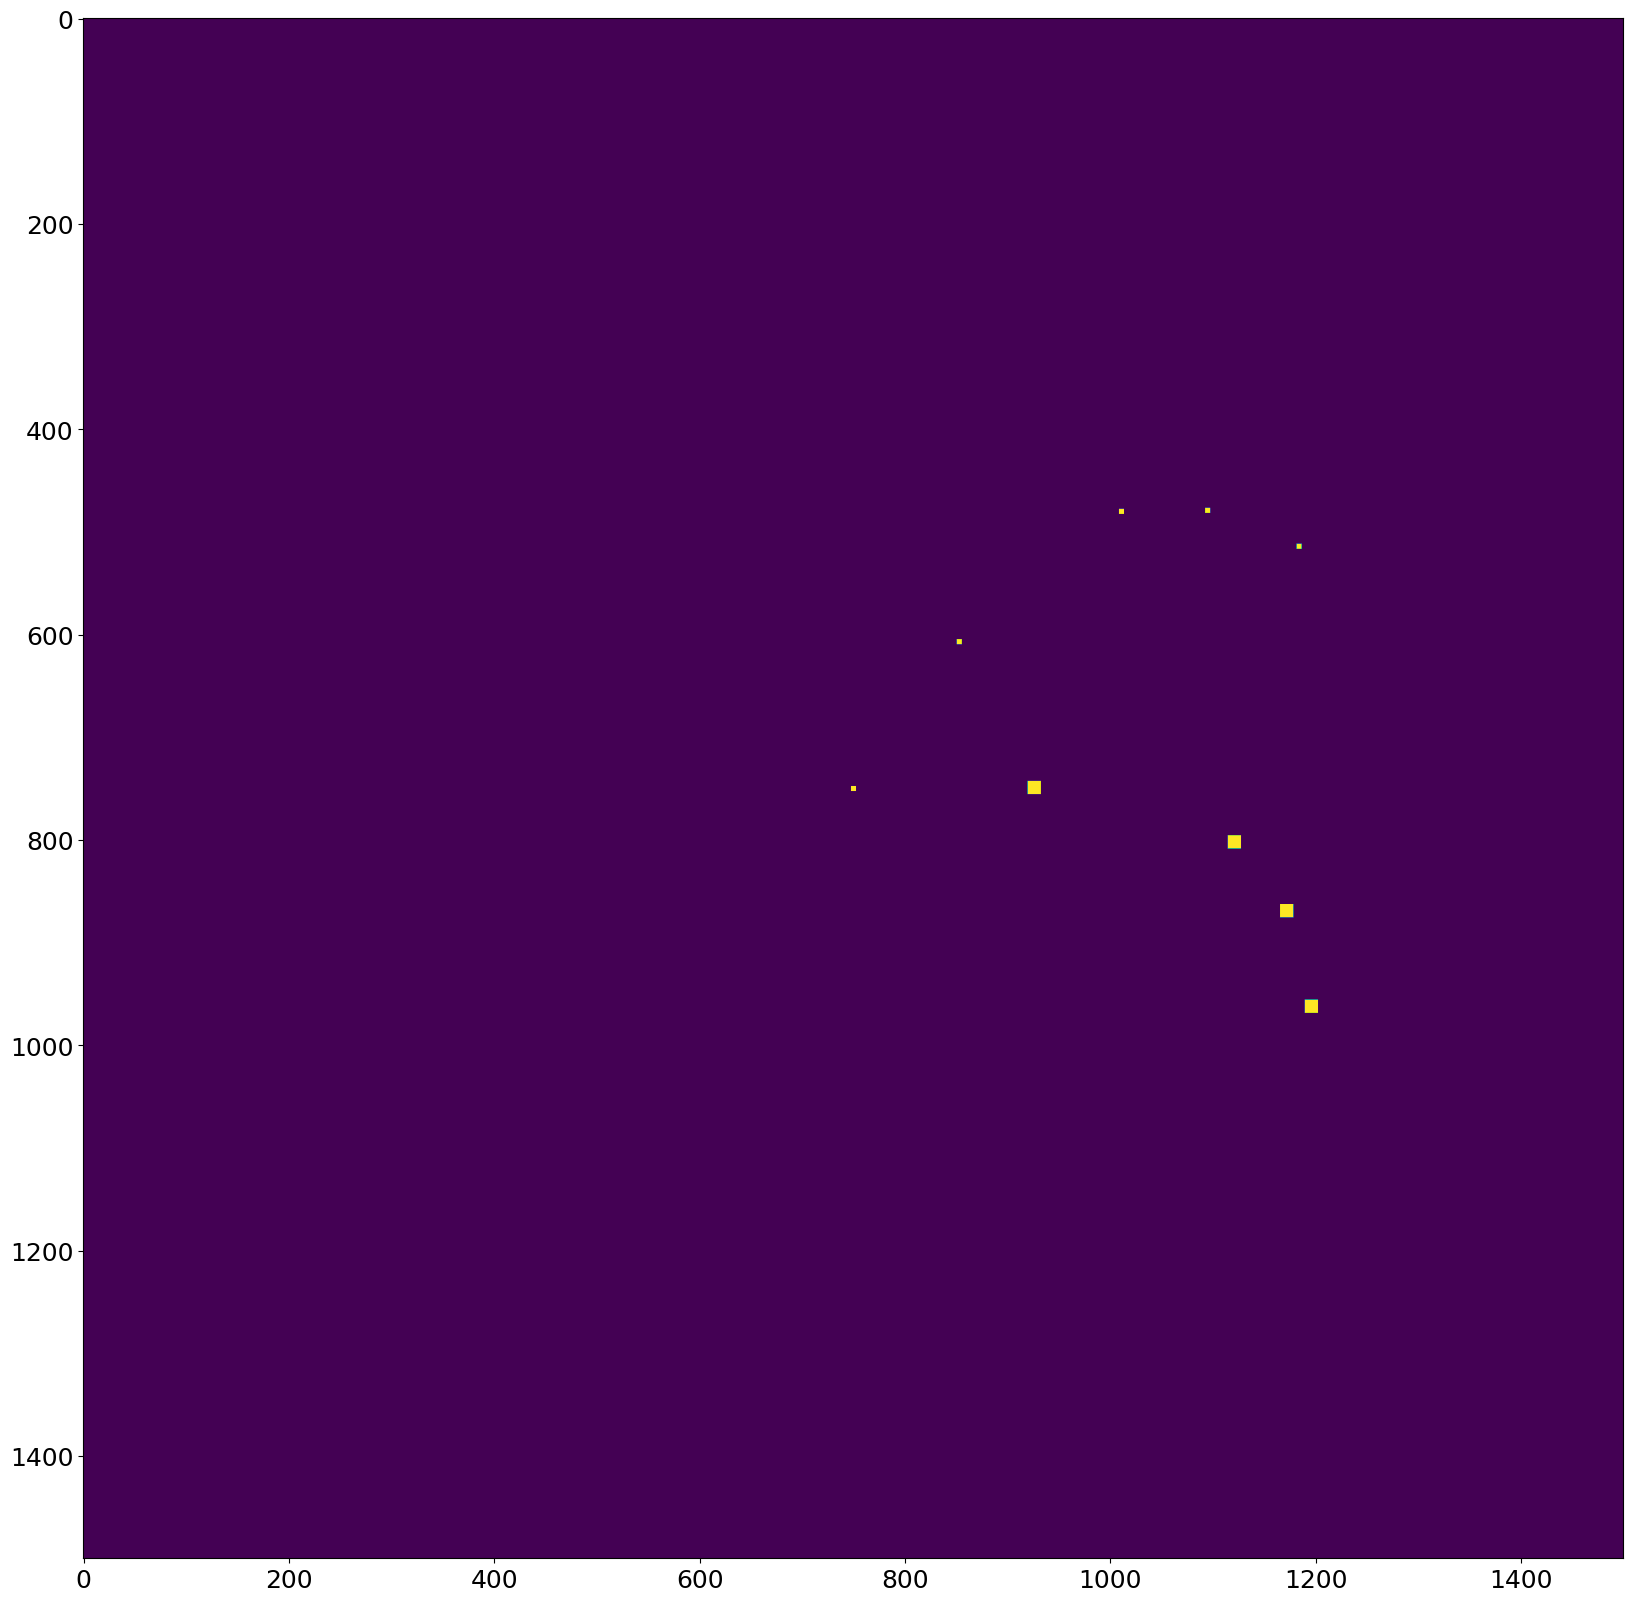

In [437]:
canvas = np.zeros((1500,1500))
# for dist in range(0,int(max_dist)):
#     canvas[shift_point(row["i_p_0_x"],row["i_p_0_y"],180 - shift_angle, dist)] = 1
#

canvas[int(rotated_points[0][0]),int(rotated_points[0][1])] = 1
canvas[int(rotated_points[1][0]),int(rotated_points[1][1])] = 1
canvas[int(rotated_points[2][0]),int(rotated_points[2][1])] = 1
canvas[int(rotated_points[3][0]),int(rotated_points[3][1])] = 1
canvas = morphology.dilation(canvas, np.ones((5,5)))
canvas = morphology.dilation(canvas, np.ones((5,5)))
canvas[row["i_p_0_0_x"], row["i_p_0_0_y"]] = 1
canvas[row["i_p_0_x"], row["i_p_0_y"]] = 1
canvas[row["i_p_1_x"], row["i_p_1_y"]] = 1
canvas[row["i_p_2_x"], row["i_p_2_y"]] = 1
canvas[row["i_p_3_x"], row["i_p_3_y"]] = 1

# canvas[row["i_p_0_0_x"], row["i_p_0_0_y"]] = 1
# canvas[row["i_p_0_x"], row["i_p_0_y"]] = 1
# row["marker_a_x"] = row["i_p_0_0_x"] + 100
# row["marker_a_y"]  = row["i_p_0_0_y"]
# row["marker_b_x"] = row["i_p_0_0_x"] + 200
# row["marker_b_y"]  = row["i_p_0_0_y"]
# canvas[row["marker_a_x"], row["marker_a_y"]] = 1
# canvas[row["marker_b_x"], row["marker_b_y"]] = 1
canvas = morphology.dilation(canvas, np.ones((5,5)))


plt.figure(figsize=(20,20))
plt.imshow(canvas.T)


In [438]:
y_horizontal_shift = int(calculate_distance((row["i_p_0_x"], row["i_p_0_y"]), (row["i_p_0_0_x"], row["i_p_0_0_y"])))

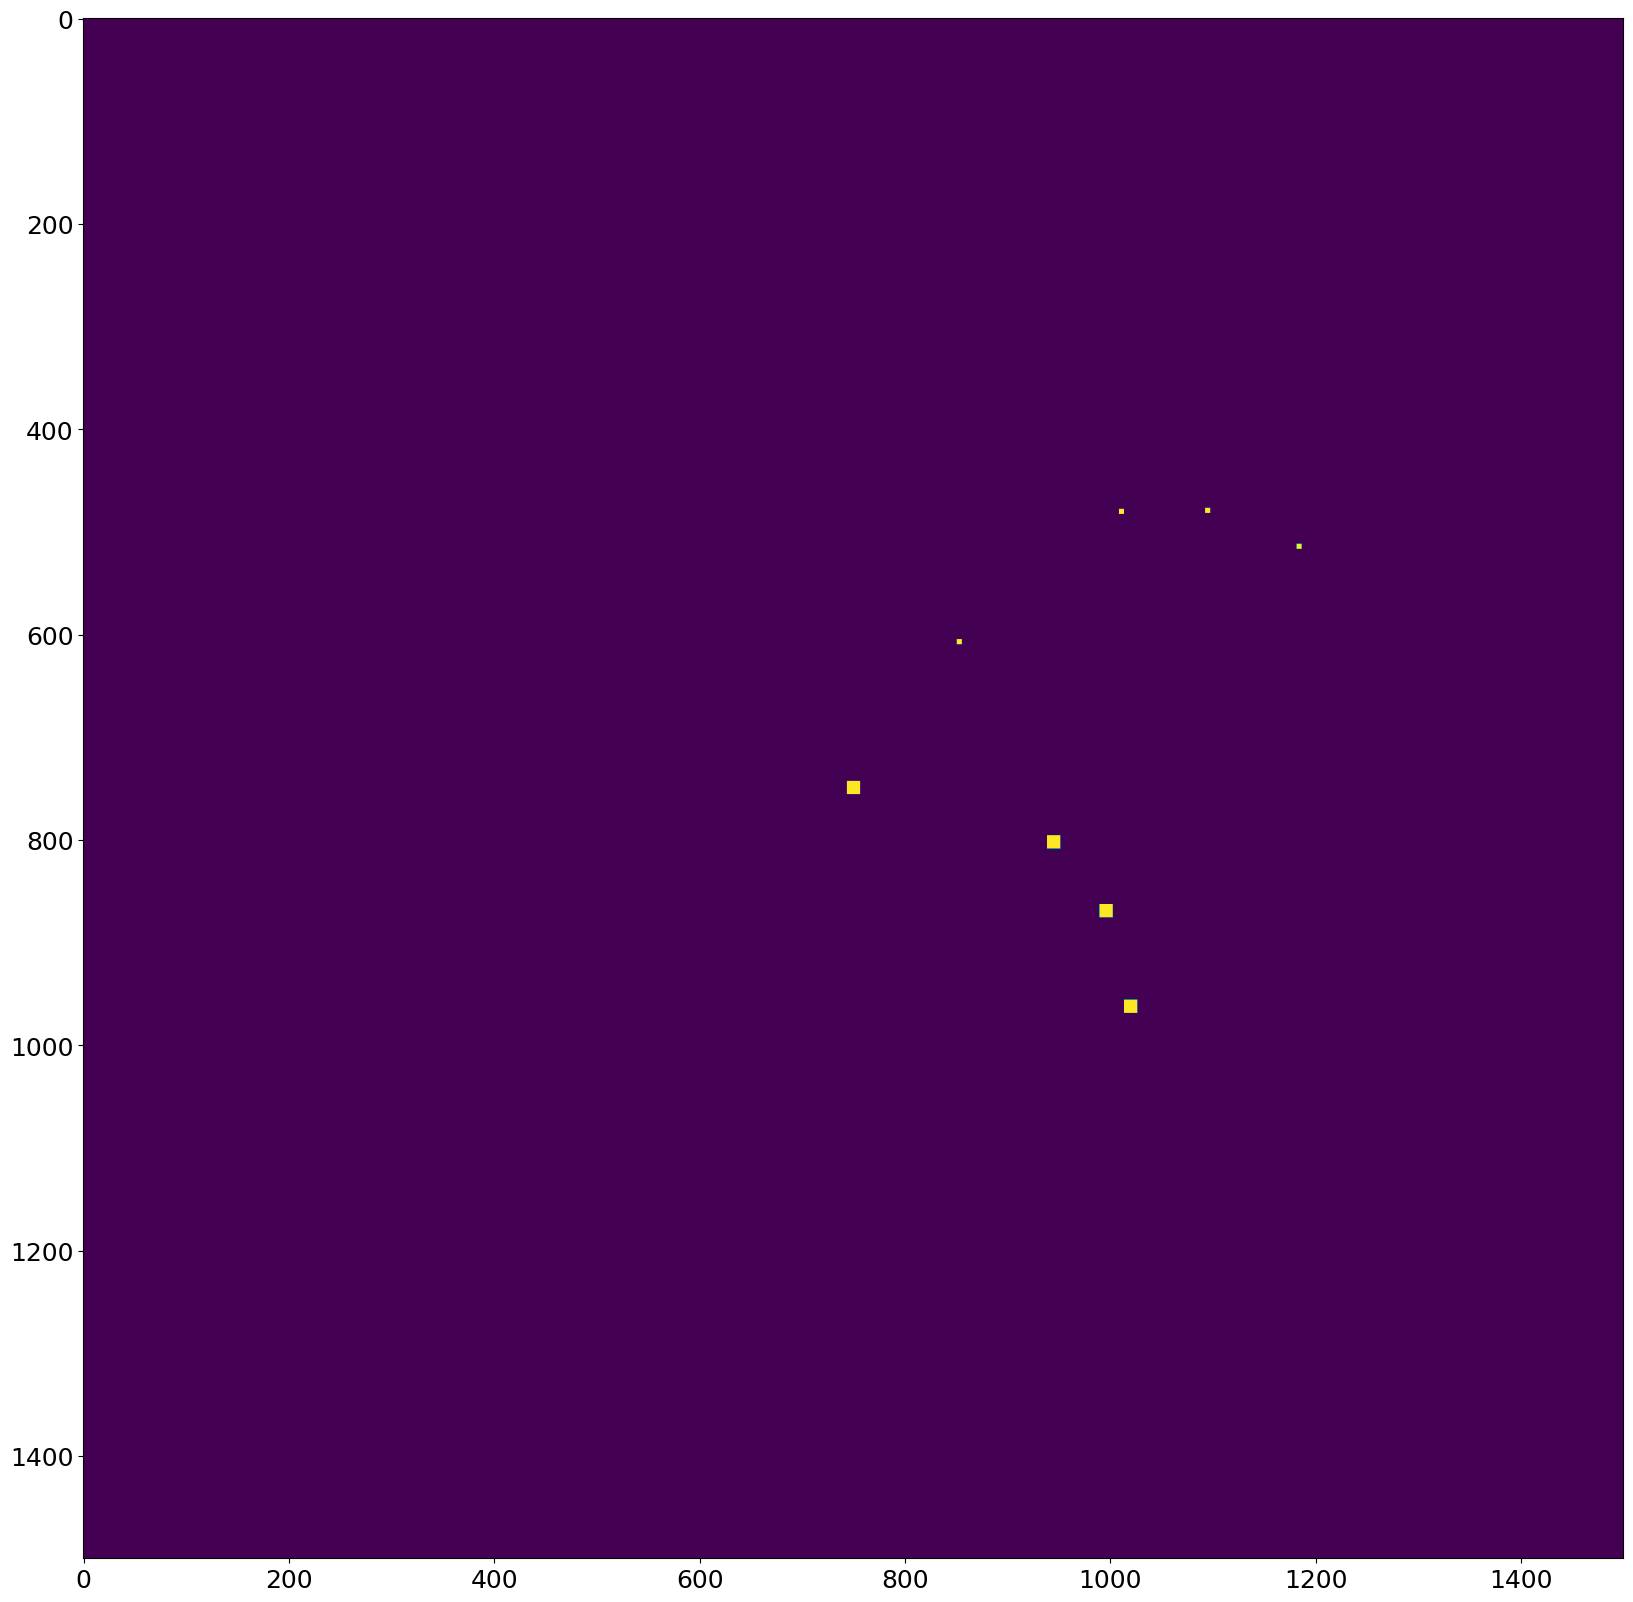

In [439]:
canvas = np.zeros((1500,1500))
# for dist in range(0,int(max_dist)):
#     canvas[shift_point(row["i_p_0_x"],row["i_p_0_y"],180 - shift_angle, dist)] = 1
#

canvas[int(rotated_points[0][0])- y_horizontal_shift,int(rotated_points[0][1])] = 1
canvas[int(rotated_points[1][0])- y_horizontal_shift,int(rotated_points[1][1])] = 1
canvas[int(rotated_points[2][0])- y_horizontal_shift,int(rotated_points[2][1])] = 1
canvas[int(rotated_points[3][0])- y_horizontal_shift,int(rotated_points[3][1])] = 1
canvas = morphology.dilation(canvas, np.ones((5,5)))
canvas = morphology.dilation(canvas, np.ones((5,5)))
canvas[row["i_p_0_0_x"], row["i_p_0_0_y"]] = 1
canvas[row["i_p_0_x"], row["i_p_0_y"]] = 1
canvas[row["i_p_1_x"], row["i_p_1_y"]] = 1
canvas[row["i_p_2_x"], row["i_p_2_y"]] = 1
canvas[row["i_p_3_x"], row["i_p_3_y"]] = 1

# canvas[row["i_p_0_0_x"], row["i_p_0_0_y"]] = 1
# canvas[row["i_p_0_x"], row["i_p_0_y"]] = 1
# row["marker_a_x"] = row["i_p_0_0_x"] + 100
# row["marker_a_y"]  = row["i_p_0_0_y"]
# row["marker_b_x"] = row["i_p_0_0_x"] + 200
# row["marker_b_y"]  = row["i_p_0_0_y"]
# canvas[row["marker_a_x"], row["marker_a_y"]] = 1
# canvas[row["marker_b_x"], row["marker_b_y"]] = 1
canvas = morphology.dilation(canvas, np.ones((5,5)))


plt.figure(figsize=(20,20))
plt.imshow(canvas.T)


In [286]:
int(row["i_p_0_0_y"])- int(row["i_p_0_y"])

143

In [229]:
y_new

603

In [302]:
import math

def calculate_angle(x1, y1, x2, y2):
    # Calculate the angle between the line formed by the first two points and the horizontal line
    angle_radians = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

def shift_angles(points, base_angle):
    # Shift all angles in the list by the base angle
    shifted_angles = []
    for i in range(1, len(points)):
        x1, y1 = points[0]
        x2, y2 = points[i]
        angle = calculate_angle(x1, y1, x2, y2)
        shifted_angle = angle - base_angle
        shifted_angles.append(shifted_angle)
    return shifted_angles

# Example usage:
points = [(0, 0), (1, 1), (2, 2), (3, 3)]  # Replace with your actual points
base_angle = calculate_angle(points[0][0], points[0][1], points[1][0], points[1][1])
shifted_angles = shift_angles(points, base_angle)

print("Base Angle:", base_angle)
print("Shifted Angles:", shifted_angles)

Base Angle: 45.0
Shifted Angles: [0.0, 0.0, 0.0]


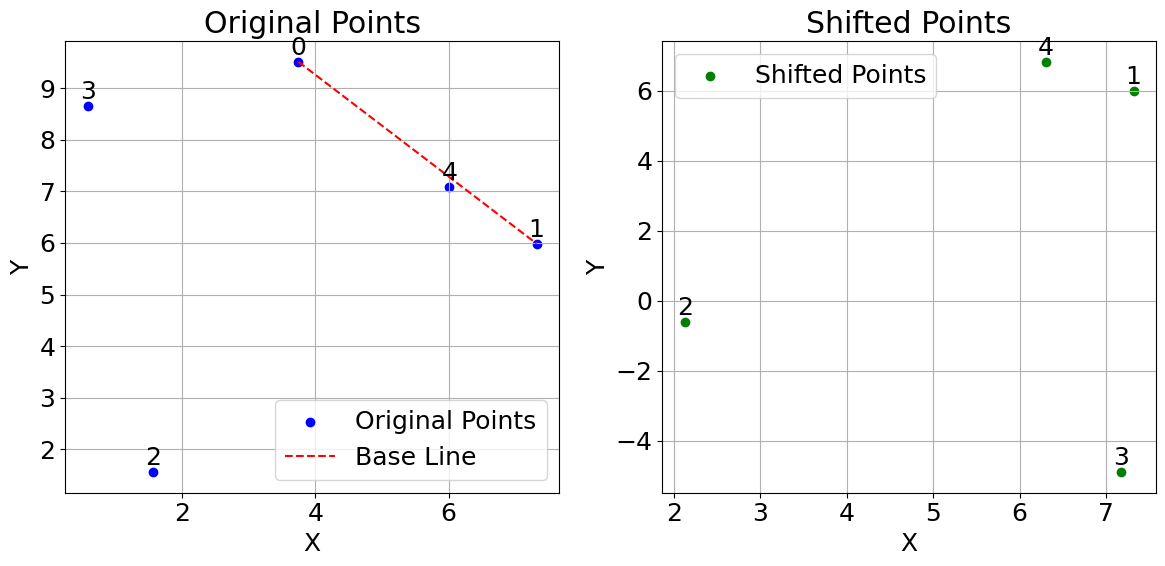

In [313]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calculate_angle(x1, y1, x2, y2):
    # Calculate the angle between the line formed by the first two points and the horizontal line
    angle_radians = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

def shift_angles(points, base_angle):
    # Shift all angles in the list by the base angle
    shifted_angles = []
    for i in range(1, len(points)):
        x1, y1 = points[0]
        x2, y2 = points[i]
        angle = calculate_angle(x1, y1, x2, y2)
        shifted_angle = angle - base_angle
        shifted_angles.append(shifted_angle)
    return shifted_angles

# Generate random points
np.random.seed(42)
num_points = 5
points = np.random.rand(num_points, 2) * 10  # Scale the points to make the example more interesting

# Calculate base angle
base_angle = calculate_angle(points[0, 0], points[0, 1], points[1, 0], points[1, 1])

# Shift angles
shifted_angles = shift_angles(points, base_angle)

# Calculate shifted points
shifted_points = []
for i, angle in enumerate(shifted_angles):
    x, y = points[i + 1]
    rotated_x = x * math.cos(math.radians(angle)) - y * math.sin(math.radians(angle))
    rotated_y = x * math.sin(math.radians(angle)) + y * math.cos(math.radians(angle))
    shifted_points.append([rotated_x, rotated_y])

shifted_points = np.array(shifted_points)

# Plotting
plt.figure(figsize=(12, 6))

# Original Points
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1], label='Original Points', color='blue')
plt.plot([points[0, 0], points[1, 0]], [points[0, 1], points[1, 1]], linestyle='--', color='red', label='Base Line')

# Add index labels for each point
for i, txt in enumerate(range(num_points)):
    plt.annotate(txt, (points[i, 0], points[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Original Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Shifted Points
plt.subplot(1, 2, 2)
plt.scatter(shifted_points[:, 0], shifted_points[:, 1], label='Shifted Points', color='green')

# Add index labels for each point
for i, txt in enumerate(range(1, num_points)):
    plt.annotate(txt, (shifted_points[i, 0], shifted_points[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Shifted Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [304]:
points

array([[3.74540119, 9.50714306],
       [7.31993942, 5.98658484],
       [1.5601864 , 1.5599452 ],
       [0.58083612, 8.66176146],
       [6.01115012, 7.08072578]])

In [310]:
shifted_angles

[0.0, -60.810379551027104, -120.47917349563326, -2.3970481183824006]